In [716]:
import numpy as np
import os

np.random.seed(23)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd

Import training and test datasets

In [717]:
df_train = pd.read_csv('datasets/titanic/train.csv')
df_test = pd.read_csv('datasets/titanic/test.csv')

print (df_train.info())
df_train.head(n=4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


Remove unneeded info and change data into format that can be read by classifier

In [718]:
df_train = df_train.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
df_train['Sex'] = df_train['Sex'].map({'male':0, 'female':1})
df_train = df_train.dropna()

print(df_train.info())
df_train.head(n=5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    714 non-null int64
Survived       714 non-null int64
Pclass         714 non-null int64
Sex            714 non-null int64
Age            714 non-null float64
SibSp          714 non-null int64
Parch          714 non-null int64
Fare           714 non-null float64
dtypes: float64(2), int64(6)
memory usage: 50.2 KB
None


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,0,22.0,1,0,7.2500
1,2,1,1,1,38.0,1,0,71.2833
2,3,1,3,1,26.0,0,0,7.9250
3,4,1,1,1,35.0,1,0,53.1000
4,5,0,3,0,35.0,0,0,8.0500


Train using DecisionTreeClassifier on training set

In [719]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

x = df_train.drop('Survived',axis=1)
y = df_train['Survived']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

classifier = DecisionTreeClassifier(max_depth=5)
classifier.fit(x_train, y_train)

print (classifier.score(x_test,y_test))


0.748837209302


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002912036AA90>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x00000291204AF748>], dtype=object)

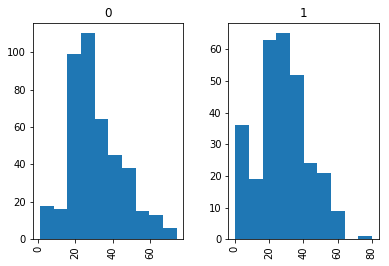

In [720]:
df_train.hist(column='Age',by=df_train['Survived'])

Reduce Ages into 3 categories of based on the graphs above

In [721]:
df_train['Age'] = df_train.Age.apply(lambda x: 0 if x <= 16 else (1 if x <= 40 else 2))
print(df_train.info())
df_train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    714 non-null int64
Survived       714 non-null int64
Pclass         714 non-null int64
Sex            714 non-null int64
Age            714 non-null int64
SibSp          714 non-null int64
Parch          714 non-null int64
Fare           714 non-null float64
dtypes: float64(1), int64(7)
memory usage: 70.2 KB
None


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,0,1,1,0,7.2500
1,2,1,1,1,1,1,0,71.2833
2,3,1,3,1,1,0,0,7.9250
3,4,1,1,1,1,1,0,53.1000
4,5,0,3,0,1,0,0,8.0500


In [722]:
x = df_train.drop('Survived',axis=1)
y = df_train['Survived']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

classifier = DecisionTreeClassifier(max_depth=5)
classifier.fit(x_train, y_train)

print (classifier.score(x_test,y_test))

0.781395348837


Simplifying age seemed to improve accuracy. Lowering and raising the category boundaries had a significant effect on how much was improved.

Since ticket fare and passenger class seem to give the same info I decided to also drop the fare column

In [723]:
df_train = df_train.drop('Fare', axis=1)

In [724]:
x = df_train.drop('Survived',axis=1)
y = df_train['Survived']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

classifier = DecisionTreeClassifier(max_depth=5)
classifier.fit(x_train, y_train)

print (classifier.score(x_test,y_test))

0.827906976744


Dropping the fare column also gave me a pretty nice improvement on accuracy

Applying same dataset changes to the test set

In [725]:
df_test = df_test.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
df_test['Sex'] = df_test['Sex'].map({'male':0, 'female':1})
df_test['Age'] = df_test.Age.apply(lambda x: 0 if x <= 16 else (1 if x <= 40 else 2))
df_test = df_test.drop('Fare', axis=1)

print(df_test.info())
df_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null int64
SibSp          418 non-null int64
Parch          418 non-null int64
dtypes: int64(6)
memory usage: 19.7 KB
None


,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,892,3,0,1,0,0
1,893,3,1,2,1,0
2,894,2,0,2,0,0
3,895,3,0,1,0,0
4,896,3,1,1,1,1


In [726]:
test_pred = classifier.predict(df_test)
df_test['Survived'] = test_pred
results = df_test[['PassengerId', 'Survived']]
print(results.info())
results.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
PassengerId    418 non-null int64
Survived       418 non-null int64
dtypes: int64(2)
memory usage: 6.6 KB
None


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [727]:
results.to_csv('datasets/titanic/results.csv',index = False)